In [82]:
## OpenDAP access library
from pydap.client import open_url
## numerical computation library
import numpy as np
## import plotting library
import matplotlib.pyplot as plt
## set plotting library to make graphs inside the worksheet, not try to open in a separate window
%matplotlib inline

In [83]:
## OpenDAP access link, with browser You may access: http://dataserver.nccs.nasa.gov/thredds/catalog/bypass/NEX-DCP30/bcsd/catalog.html
tds_url_base='http://dataserver.nccs.nasa.gov/thredds/catalog/bypass/NEX-DCP30/bcsd'

In [84]:
## Open scenario rcp45, model GFDL-ESM2M, variable pr
pr_GFDLESM2M_rcp45=open_url('http://dataserver.nccs.nasa.gov/thredds/dodsC/bypass/NEX-DCP30/bcsd/rcp45/r1i1p1/GFDL-ESM2M_pr.ncml')

In [85]:
## what does variable pr_GFDLESM2M_rcp45 actually contain?? Just execute variable name

In [86]:
pr_GFDLESM2M_rcp45

{'lat': <pydap.model.BaseType object at 0x32a1350>, 'lon': <pydap.model.BaseType object at 0x35faa10>, 'lat_bnds': <pydap.model.BaseType object at 0x35fa290>, 'lon_bnds': <pydap.model.BaseType object at 0x35eae10>, 'GFDL-ESM2M_pr': {'GFDL-ESM2M_pr': <pydap.model.BaseType object at 0x333c710>, 'time': <pydap.model.BaseType object at 0x35f1890>, 'lat': <pydap.model.BaseType object at 0x35f1110>, 'lon': <pydap.model.BaseType object at 0x35f1a50>}, 'time': <pydap.model.BaseType object at 0x36010d0>, 'time_bnds': <pydap.model.BaseType object at 0x35f1450>}

In [87]:
## So open_url contains dictionary with following keys:
pr_GFDLESM2M_rcp45.keys()

['lat', 'lon', 'lat_bnds', 'lon_bnds', 'GFDL-ESM2M_pr', 'time', 'time_bnds']

values corresponding to the keys are pydap objects, which will download necessary data if requested. You can see available options by typing variable name, then dot and pressing TAB
After initializing variable, just write "ttt." and press TAB

In [88]:
ttt=pr_GFDLESM2M_rcp45['time']

In [89]:
ttt.dimensions

('time',)

In [90]:
ttt.attributes

{'_ChunkSizes': 1,
 'axis': 'T',
 'bounds': 'time_bnds',
 'calendar': 'standard',
 'calendar_type': 'noleap',
 'cartesian_axis': 'T',
 'long_name': 'time',
 'standard_name': 'time',
 'units': 'days since 1950-01-01 00:00:00'}

In [91]:
ttt_values=ttt.data[:]

In [92]:
ttt_values[0]

20469.5

In [93]:
ttt_values[-1]

54771.5

In [94]:
latitudes=pr_GFDLESM2M_rcp45['lat']

In [95]:
latitudes[:][0]

24.0625

In [96]:
latitudes[:][-1]

49.92916665632

In [97]:
latitudes.shape

(3105,)

In [98]:
pr_GFDLESM2M_rcp45['lon'].shape

(7025,)

In [99]:
## WHAT is wrong with this request?
pr_GFDLESM2M_rcp45_datavalues=pr_GFDLESM2M_rcp45['GFDL-ESM2M_pr'][:]

ServerError: 'Server error 403: "Request too big=98418.564 Mbytes, max=500.0"'

In [100]:
pr_GFDLESM2M_rcp45_datavalues=pr_GFDLESM2M_rcp45['GFDL-ESM2M_pr']['GFDL-ESM2M_pr'][:,1500,1500]

beware that resulting array is of shape [1000,1,1], so to access on series from it, something like pr_GFDLESM2M_rcp45_datavalues[:,0,0] is needed

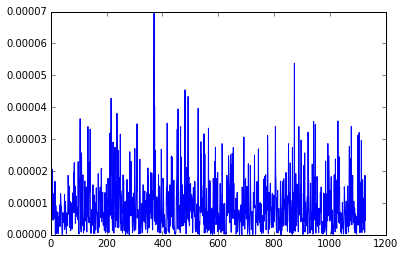

In [101]:
plt.plot(pr_GFDLESM2M_rcp45_datavalues[:,0,0])

In [72]:
## create nicely formatted time axis
import datetime
timestart=datetime.datetime(1950,1,1)

In [102]:
t_nice=[]
for i in ttt_values:
    t_nice.append(timestart+datetime.timedelta(days=i))

In [103]:
t_nice=np.array(t_nice)

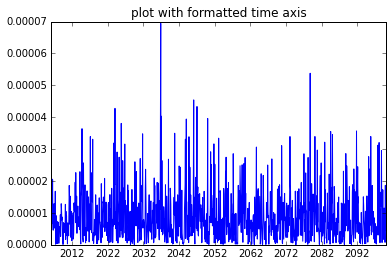

In [105]:
plt.plot(t_nice,pr_GFDLESM2M_rcp45_datavalues[:,0,0])
plt.title('plot with formatted time axis')